## Database filtering

Data filtering the visual database related to rat's behavior - removal of movement interrupting acuity tests:
1. Rearing
2. Scratching
3. Moving around

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/'
dfrat = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')

## Data visualizaiton before filtering

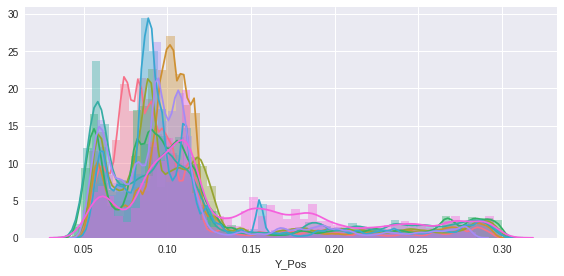

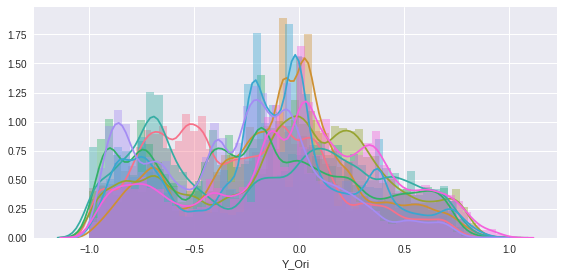

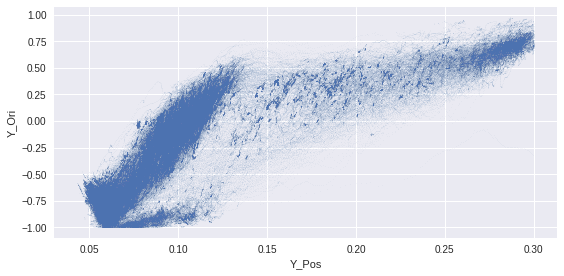

In [2]:
# postiion distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

# oritentation distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

# scatter between orientation and position
g = sns.FacetGrid( data=dfrat, size=4, aspect=2)
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);


## Rearing removal
Removal based on Y axis postion limit - low pass filter

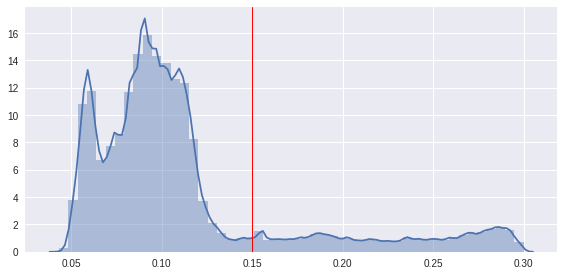

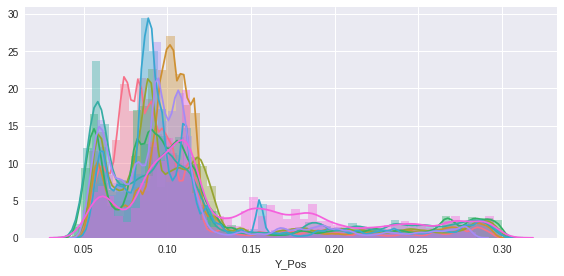

In [3]:
# postiion distribution visualization + suggested data cut
g = sns.FacetGrid(data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');
g.map(plt.axvline, x=0.15, alpha=1, linewidth=1, color='red');

g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

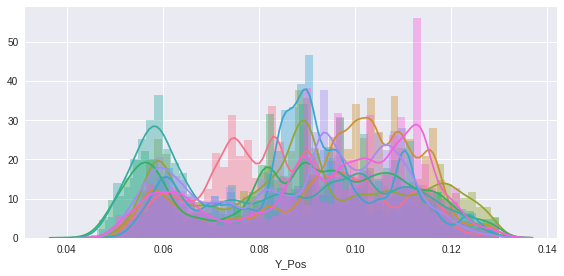

In [4]:
# Low pass filetring of Y position
rearinglimit = 0.13
dfratrear = dfrat[dfrat['Y_Pos'] < rearinglimit]

# Plotting after filtering
g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

## Scratching and cleaning removal
Removal based on Y axis orientation limit - high pass filter

MY THEORY: removing when Y_Ori and Y_Pos smaller then given limit
 1. both bumps in position and orietnation - rearing behavior
 2. remove based on bump detection in orientation
 3. cut off line: minimum distribution in half of the daya
 4. verifying if only that data is removed

goal: removing data where both position and orientation of the nose were very low


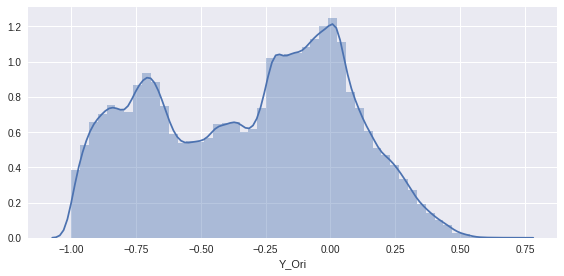

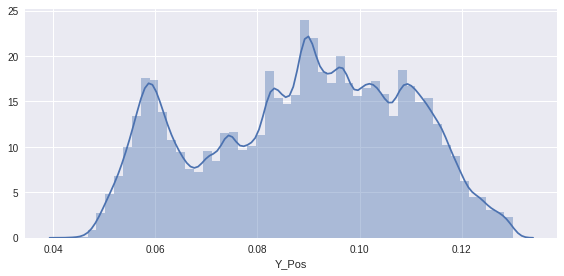

In [14]:
# distributions of all datasets
g = sns.FacetGrid(data=dfratrear, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(data=dfratrear, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

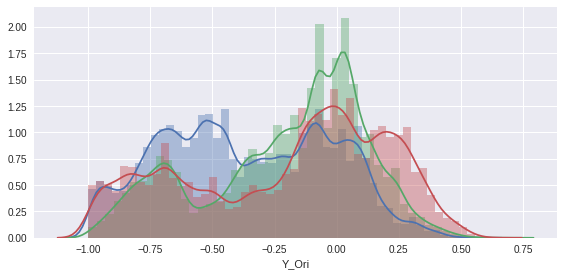

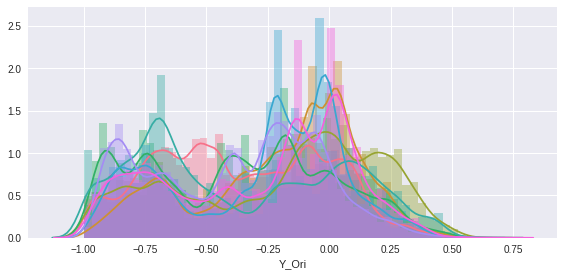

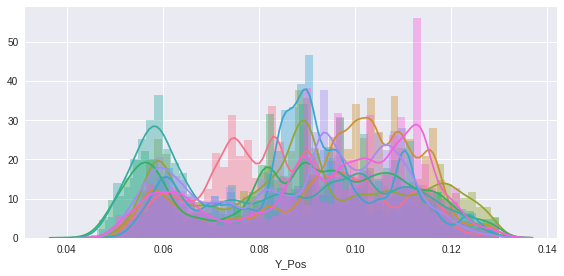

In [103]:
# distribution per experiment
g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2, hue_order=[0,1,2])
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2)#, hue_order=[4,5])
g.map(sns.distplot, 'Y_Pos');

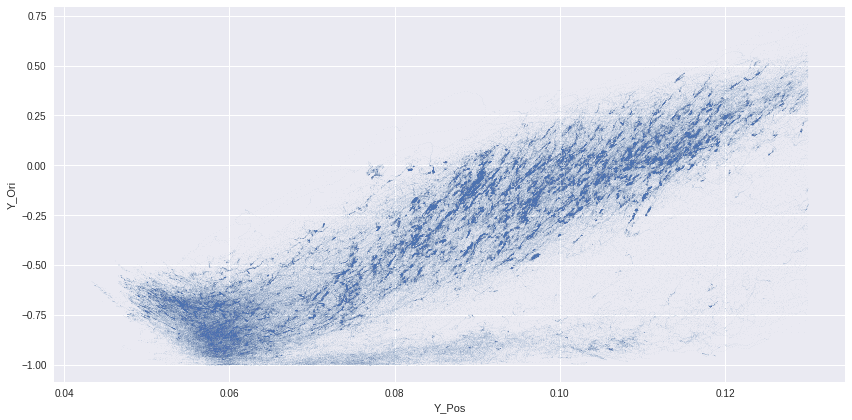

In [70]:
# relationship between position and orientation in Y axis before filtering
g = sns.FacetGrid( data=dfratrear, size=6, aspect=2)
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

In [101]:
# looking for cut of point on distribution histogram for each experiment
limitori = {}
halfdat = dfrat.copy()
halfdat = halfdat[(halfdat['Y_Ori'] < 0) & (halfdat['Y_Ori'] >-.8)]

for i, dd in halfdat.groupby('session_id'):
    histogram = np.histogram(dd.Y_Ori, 'auto')
    index = histogram[0].argmin()
    limitori[i]= histogram[1][index] 
#     print(limitori[i], limitori[i]*1.1)
limitori

{0: -0.3384711773850953,
 1: -0.56362554585008584,
 2: -0.43636456660282869,
 3: -0.56000434798504917,
 4: -0.34285875263616883,
 5: -0.46667048173348774,
 6: -0.49231246242750115,
 7: -0.50285230176767626}

In [95]:
# looking for cut of point on distribution histogram for each experiment
limitpos = {}
halfdatP = dfrat.copy()
halfdatP = halfdatP[(halfdatP['Y_Pos'] < .08) & (halfdat['Y_Pos'] >.06)]


for i, dd in halfdatP.groupby('session_id'):
    histogram = np.histogram(dd.Y_Pos, 'auto')
    index = histogram[0].argmin()
    limitpos[i]= histogram[1][index] * .9
    
limitpos

{0: 0.058200861161015284,
 1: 0.062571855558579983,
 2: 0.065999389466128627,
 3: 0.063000562511432823,
 4: 0.068399425146127985,
 5: 0.070702870383841779,
 6: 0.058154769068052663,
 7: 0.068821900642527037}

In [84]:
dfratclean2 = pd.DataFrame()
for i, dd in dfratrear.groupby('session_id'):
    dd = dd[(dd['Y_Ori'] > limitori[i]) & (dd['Y_Pos'] > limitpos[i])]
    dfratclean2 = pd.concat([dfratclean2, dd], axis=0, ignore_index=True)

In [98]:
dfratclean = pd.DataFrame()
for i, dd in dfratrear.groupby('session_id'):
#     dd = dd[(dd['Y_Ori'] > limitori[i]) & (dd['Y_Pos'] > limitpos[i])]
#     dd = dd[(dd['Y_Ori'] > limitori[i])]
#     dd = dd[(dd['Y_Pos'] > limitpos[i])]
    dd = dd[(dd['Y_Ori'] >-0.75) & (dd['Y_Pos'] > 0.07)]

    dfratclean = pd.concat([dfratclean, dd], axis=0, ignore_index=True)

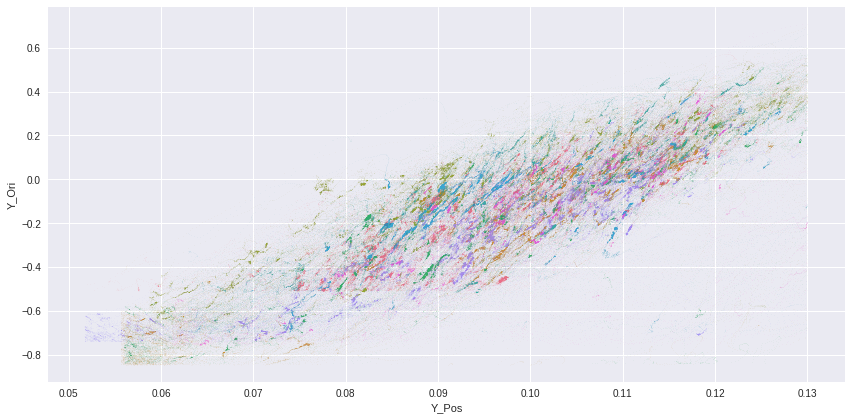

In [99]:
# relationship between position and orientation in Y axis after filtering
g = sns.FacetGrid( data=dfratclean2, size=6, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

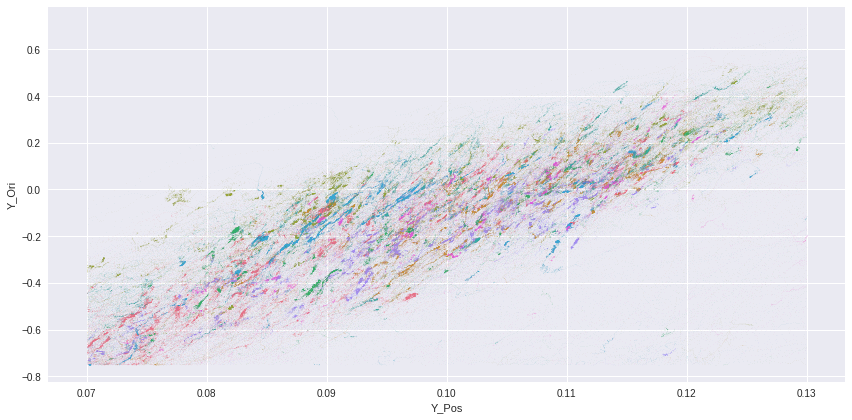

In [100]:
# relationship between position and orientation in Y axis after filtering
g = sns.FacetGrid( data=dfratclean, size=6, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

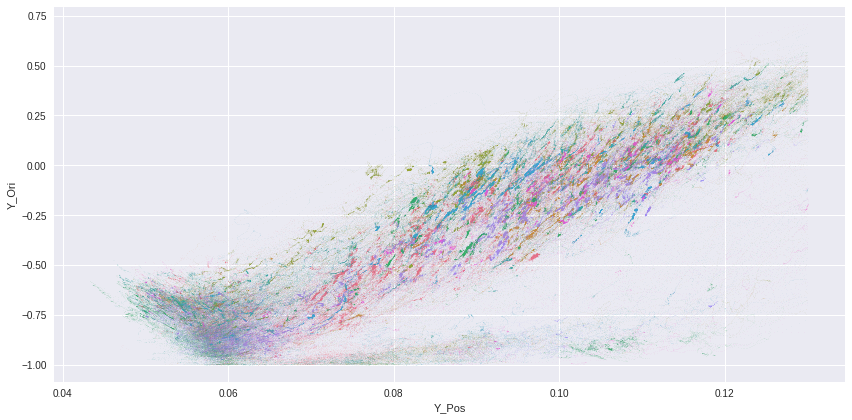

In [77]:
# relationship between position and orientation in Y axis before filtering
g = sns.FacetGrid( data=dfratrear, size=6, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

NameError: name 'limit' is not defined

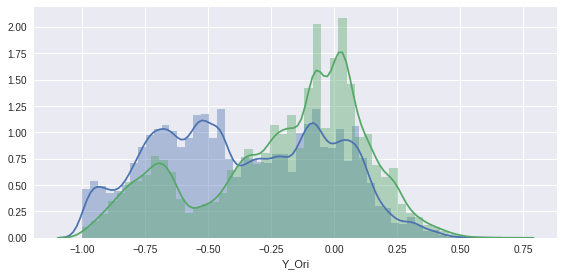

In [13]:
g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2, hue_order=[0,1])
g.map(sns.distplot, 'Y_Ori');
g.map(plt.axvline, x=limit[0], alpha=1, linewidth=1, color='blue');
g.map(plt.axvline, x=limit[1], alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2,hue_order=[0,1] )
g.map(sns.distplot, 'Y_Ori');
g.map(plt.axvline, x=limit[0], alpha=1, linewidth=1, color='blue');
g.map(plt.axvline, x=limit[1], alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2, hue_order=[0,1] )
g.map(sns.distplot, 'Y_Pos');

g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2, hue_order=[0,1] )
g.map(sns.distplot, 'Y_Pos');


In [ ]:
g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2, )
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2, )
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratrear, size=4, aspect=2, )
g.map(sns.distplot, 'Y_Pos');

g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');


In [ ]:
g = sns.FacetGrid(col='session_id', data=dfrat, size=4, aspect=2, )
g.map(sns.distplot, 'Y_Pos');
g.map(plt.axvline, x=0.07, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(col='session_id', data=dfratclean, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');
g.map(plt.axvline, x=0.07, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(col='session_id', data=dfrat, size=4, aspect=2, )
g.map(sns.distplot, 'Y_Ori');
g.map(plt.axvline, x=-0.6, alpha=1, linewidth=1, color='red');


g = sns.FacetGrid(col='session_id', data=dfratclean, size=4, aspect=2, )
g.map(sns.distplot, 'Y_Ori');
g.map(plt.axvline, x=-0.6, alpha=1, linewidth=1, color='red');


## Smoothing the data -  velocity verified

Rolling window applyed on X, Y, Z positiona and orientation data.

In [ ]:
windowsize = 200
colChoice = ['X_Pos', 'Y_Pos', 'Z_Pos', 'X_Ori', 'Y_Ori', 'Z_Ori']

df = dfrat.copy()
g = df.groupby('session_id')
df[colChoice] = g[colChoice].rolling(window=windowsize).mean().values


In [ ]:
## DATASETS FOR VISUALIZATION
pos_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Position', value_vars=['X_Pos', 'Y_Pos', 'Z_Pos'], var_name='Dimension')

ori_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Orientation', value_vars=['X_Ori', 'Y_Ori', 'Z_Ori'], var_name='Dimension')

# smoothed data
pos_lSM = df.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Position', value_vars=['X_Pos', 'Y_Pos', 'Z_Pos'], var_name='Dimension')

ori_lSM = df.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Orientation', value_vars=['X_Ori', 'Y_Ori', 'Z_Ori'], var_name='Dimension')


## Distribution

In [ ]:
g = sns.FacetGrid(hue='session_id', col='Dimension', data=pos_l, size=4, aspect=2)
g.map(sns.distplot, 'Position');

g = sns.FacetGrid(hue='session_id', col='Dimension', data=pos_lSM, size=4, aspect=2)
g.map(sns.distplot, 'Position');

In [ ]:
g = sns.FacetGrid(hue='session_id', col='Dimension', data=ori_l, size=4, aspect=2)
g.map(sns.distplot, 'Orientation');

g = sns.FacetGrid(hue='session_id', col='Dimension', data=ori_lSM, size=4, aspect=2)
g.map(sns.distplot, 'Orientation');


## Velocity - rapid movement smooting check

In [ ]:
pd.options.mode.chained_assignment = None 

#extraction of speed of positon changes and calculating velocity in all axes
dfPos = pd.DataFrame()
dfV = df.copy().dropna()
colList = ['Time', 'X_Pos', 'Y_Pos', 'Z_Pos']
dcolList = ['dT', 'dX_Pos', 'dY_Pos', 'dZ_Pos']

for name, dd in dfV.groupby('session_id'):
    dd[dcolList] = dd[colList].diff(-1)    
    dd['Vx_Pos'] = dd['dX_Pos'] / dd['dT']
    dd['Vy_Pos'] = dd['dY_Pos'] / dd['dT']
    dd['Vz_Pos'] = dd['dZ_Pos'] / dd['dT']
    dd['Vxyz_Pos'] = np.linalg.norm(dd[['Vx_Pos', 'Vy_Pos', 'Vz_Pos']].values, axis=1) # diagonal velocity   

    dfPos = pd.concat([dfPos, dd], axis=0, ignore_index=True)

dfPos = dfPos.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
## POSITION VXYZ VELOCITY
g = sns.FacetGrid(hue='session_id', data=dfPos, size=4, aspect=2, hue_order=[1,2])
g.map(plt.plot, "Time", "Vxyz_Pos", alpha=1, linewidth=0.8);

g = sns.FacetGrid(hue='session_id', data=dfPos, size=4, aspect=2)#, hue_order=[1,2])
g.map(sns.distplot, 'Vxyz_Pos');
